# Trabajo Práctico 1 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 - 

Analizar qué sucede con la solución del sistema  $p=(I-A)^{-1}d=Ld$ en cada uno de los siguientes casos:  
**a)** $(I-A)$ es inversible  
**b)** $(I-A)$ es inversible y $d=0$  
**c)** $(I-A)$ no es inversible  
**d)** $(I-A)$ no es inversible y $d=0$ 

---------------------------

Observemos primero que el sistema es equivalente a $(I-A)p=d$  
**a)** Si $(I-A)$ es inversible, el sistema es compatible determinado, por lo que tiene solución única.  
**b)** Si $(I-A)$ es inversible y $d=0$ , el sistema tiene como única solución a $p=0$.  
**c)** Si $(I-A)$ no es inversible, el sistema puede tener solución o no, dependiendo de si $d \in Im(I-A)$  
- si $d \notin Im(I-A)$ entonces el sistema no tiene soluciones.  
- si $d \in Im(I-A)$ entonces el sistema tiene infinitas soluciones.
**d)** Si $(I-A)$ no es inversible y $d=0$, el sistema tiene infinitas soluciones.

### Consigna 2 -  

Implementar el cálculo de la inversa de la matriz $(I−A)$ aplicando LU. Para 
ello completar el código de la función `calcularLU` que se encuentra en el archivo funciones.py 
de template del TP. Esta función debe devolver las matrices L y U. Luego, completar el código
de la otra función `inversaLU(L,U)` que devuelve la inversa final a través de las matrices L y U
devueltas por la anterior función. Para resolver sistemas, únicamente podrá utilizarse la
función `scipy.linalg.solve_triangular` de la biblioteca `scipy.linalg` que resuelve sistemas triangulares.

### Consigna 3-  

Resolver el sistema $\mathbf{p}=(\mathbf{I}-\mathbf{A})^{-1}\mathbf{d}=\mathbf{L}\mathbf{d}$ utilizando `inversaLU` para los siguientes valores  de $\mathbf{A}$ y $\mathbf{d}$:

In [170]:
import numpy as np

A = np.array([[0.3 , 0.0 , 0.1],
              [0.05, 1.0 , 0.2],
              [0.1 , 0.15, 0.1]])

d = np.array([100, 100, 300])

print('A = \n', A)
print('d = ', d)

A = 
 [[0.3  0.   0.1 ]
 [0.05 1.   0.2 ]
 [0.1  0.15 0.1 ]]
d =  [100 100 300]


- ¿Hay una justificación económica de los valores encontrados para $p$?
- ¿Cuál es la característica de la matriz que lleva a esta solución?

----------------------------

In [6]:
import funciones

n = A.shape[0]
I = np.eye(n)

L,U,P = funciones.calcularLU(I-A)
print('L = \n',L)
print('U = \n',U)
print('P = \n',P)

L = 
 [[ 1.          0.          0.        ]
 [-0.14285714  1.          0.        ]
 [-0.07142857 -0.          1.        ]]
U = 
 [[ 0.7         0.         -0.1       ]
 [ 0.         -0.15        0.88571429]
 [ 0.          0.         -0.20714286]]
P = 
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [8]:
np.allclose(P@(I-A),L@U)

True

Vemos que la descomposición es correcta.

In [10]:
Leontief = funciones.inversaLU(L,U,P)
print(Leontief) #matriz de Leontief

[[  1.37931034  -0.68965517   0.        ]
 [ -2.98850575 -28.50574713  -6.66666667]
 [ -0.34482759  -4.82758621  -0.        ]]


In [12]:
np.allclose(Leontief@(I-A),I)

True

La inversa también es correcta.

In [14]:
p = Leontief@d

La producción calculada para este modelo fue de:

In [16]:
for i in range(p.shape[0]):
    print(int(p[i]), 'unidades del producto', i)

68 unidades del producto 0
-5149 unidades del producto 1
-517 unidades del producto 2


Vemos que obtenemos valores de producción negativos para los productos 2 y 3. Esto nos da un indicio de que la demanda no se puede satisfacer para estos productos para este modelo. Viendo la matriz de flujo $A$, podemos ver que el producto 2 necesita el 100% de su propia producción para seguir produciendo, esto vuelve al sistema realmente inestable pues cualquir otra demanda del producto 2 por parte de otro sector sería insostenible; como en este caso, que el producto 3 necesita además el 15% de la producción del producto 2, además de la demanda externa (que si fuera 0, se solucionaría con una producción de 0). Este problema se refleja en una producción negativa de los productos 2 y 3, ya que el producto 3 depende del 2.  
La caraceterística de la matriz que nos da este indicio es que tiene una columna que suma más de 1, es decir, $$ ||A||_1 > 1 $$

### Consigna 4-

Analizar analíticamente qué sucede con la producción total cuando a partir de una demanda externa $\mathbf{d}$, la demanda externa para el producto 3 cambia en un $\Delta \mathbf{d}$. La demanda externa se convierte en
$$
\mathbf{d}' = \mathbf{d} + \begin{pmatrix} 
0 \\
0 \\
1
\end{pmatrix}
$$

Obtener la expresion del vector $\Delta \mathbf{p}$ correspondiente a este ejemplo.


-------------------------

Sea entonces $\Delta \mathbf{d} = \mathbf{d}' - \mathbf{d}$ el cambio en la demanda externa del producto 3, y siendo la formula para la producción $\mathbf{p}=(\mathbf{I}-\mathbf{A})^{-1}\mathbf{d}$.  
Definimos $\Delta \mathbf{p} = \mathbf{p}' - \mathbf{p}$ como el cambio en la producción total correspondiente al cambio en la demanda.  
La formula para la producción estará dada por $\mathbf{p}'=(\mathbf{I}-\mathbf{A})^{-1}\mathbf{d}'$, y reemplazando $\mathbf{d}'$ obtenemos 
$$
\mathbf{p}'=(\mathbf{I}-\mathbf{A})^{-1}(\mathbf{d}+ \Delta \mathbf{d})
$$

distribuyendo
$$
\mathbf{p}'=(\mathbf{I}-\mathbf{A})^{-1}\mathbf{d} + (\mathbf{I}-\mathbf{A})^{-1}\Delta \mathbf{d}
$$

y como teníamos que $\mathbf{p}=(\mathbf{I}-\mathbf{A})^{-1}\mathbf{d}$, queda que
$$
\mathbf{p}'=\mathbf{p} + (\mathbf{I}-\mathbf{A})^{-1}\Delta \mathbf{d}
$$

con lo cual $\mathbf{p}' - \mathbf{p}= (\mathbf{I}-\mathbf{A})^{-1}\Delta \mathbf{d}$. Finalmente obtenemos
$$
\Delta \mathbf{p}=(\mathbf{I}-\mathbf{A})^{-1}\Delta \mathbf{d}
$$


En el caso particular en que $\Delta \mathbf{d} = (0,0,1)^T$, notemos que el producto $(\mathbf{I}-\mathbf{A})^{-1}(0,0,1)^T$ nos devuelve la tercera columna de la matriz de Leontief. Este es un resultado importante pues nos dice que un cambio en la demanda del producto 3, afectará a la producción de todos los productos que dependan del producto 3.

### Consigna 5-

Encontrar los coeficientes técnicos $\mathbf{A}$ y la matriz de Leontief para la siguiente economía.

|                    | Demanda Interna |                       |                       | Total Producido |
| ------------------ | :-------------: | :-------------------: | :-------------------: | :-------------: |
|                    | S₁              | S₂                    | S₃                    |                 |
| S₁                 | 350             | 0                     | 0                     | 1000            |
| S₂                 | 50              | 250                   | 150                   | 500             |
| S₃                 | 200             | 150                   | 550                   | 1000            |


---------------------

In [18]:
p = np.array([1000,500,1000])
#P = p*np.eye(3)
## Como P es una matriz diagonal, su inversa será el inverso multiplicativo de cada elemento de la diagonal
P_inversa = (1/p)*np.eye(3)

In [20]:
Z = np.array([[350,   0,   0], 
              [50,  250, 150],
              [200, 150, 550]])

A = Z @ P_inversa

In [22]:
print('La matriz de coeficientes técnicos es A = \n',A)

La matriz de coeficientes técnicos es A = 
 [[0.35 0.   0.  ]
 [0.05 0.5  0.15]
 [0.2  0.3  0.55]]


In [24]:
## Calculamos la descomposicion LU para hallar la inversa de (I-A)
n = A.shape[0]
I = np.eye(n)

L,U,P = funciones.calcularLU(I-A)

In [26]:
Leontief = funciones.inversaLU(L,U,P)
print(Leontief) #matriz de Leontief

[[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


### Consigna 6-

A partir de la fórmula
$$
\left( \left( \begin{array}{cc} 
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m} 
\end{array} \right)
- \left( \begin{array}{cc} 
A^{rr} & A^{rs} \\
A^{sr} & A^{ss} 
\end{array} \right) \right) 
\left( \begin{array}{c} 
p^r \\
p^s 
\end{array} \right)
= \left( \begin{array}{c} 
d^r \\
d^s 
\end{array} \right)
$$

deducir cómo se calcula la variación de la producción en la región *r* para cubrir una variación de la demanda considerando las relaciones inter-regionales. Fijando por simplicidad $\Delta \mathbf{d}^s=0$, deducir la fórmula:
$$
\Delta \mathbf{p}^r = (\mathbf{I}-\mathbf{A}^{rr}-\mathbf{A}^{rs}(\mathbf{I}-\mathbf{A}^{ss})^{-1}\mathbf{A}^{sr})^{-1}\Delta \mathbf{d}^r
$$

----------------------

Como $\mathbf{A}^{rr} \in \mathbb{R}^{n \times n}, \mathbf{A}^{ss} \in \mathbb{R}^{m \times m}, \mathbf{A}^{sr} \in \mathbb{R}^{m \times n}, \mathbf{A}^{rs} \in \mathbb{R}^{n \times m}$, hacemos la resta de matrices en bloques y nos queda


$$
\begin{pmatrix}
I - A^{rr} & -A^{rs} \\
-A^{sr} & I - A^{ss}
\end{pmatrix}
\begin{pmatrix}
p^r \\
p^s
\end{pmatrix}
=
\begin{pmatrix}
d^r \\
d^s
\end{pmatrix}
$$


Haciendo los cálculos para $\Delta \mathbf{p}$ y $\Delta \mathbf{d}$, con

$$
\Delta \mathbf{p} = \begin{pmatrix} \Delta p^r \\ \Delta p^s \end{pmatrix},
\Delta \mathbf{d} = \begin{pmatrix} \Delta d^r \\ \Delta d^s \end{pmatrix}
$$

Recordando que $\Delta \mathbf{d}^s=0$, tenemos que
$$
\begin{pmatrix}
I - A^{rr} & -A^{rs} \\
-A^{sr} & I - A^{ss}
\end{pmatrix}
\begin{pmatrix}
\Delta p^r \\
\Delta p^s
\end{pmatrix}
=
\begin{pmatrix}
\Delta d^r \\
0
\end{pmatrix}
$$


Con lo cual, haciendo la multiplicación matricial nos quedan dos ecuaciones
$$
(I - A^{rr}) \Delta p^r - A^{rs} \Delta p^s = \Delta d^r \tag{1}
$$
$$
-A^{sr} \Delta p^r + (I - A^{ss}) \Delta p^s = 0 \tag{2}
$$

Despejando $\Delta \mathbf{p}^r$ de la primera ecuación
$$
\Delta p^r = (I - A^{rr})^{-1} \left( \Delta d^r + A^{rs} \Delta p^s \right) \tag{3}
$$

Y despejando $\Delta \mathbf{p}^s$ de la segunda ecuación
$$
\Delta p^s = (I - A^{ss})^{-1} A^{sr} \Delta p^r \tag{4}
$$

Ahora sustituimos el valor de $\Delta \mathbf{p}^s$ de la ecuacion $(4)$ en la ecuación $(3)$:
$$
\Delta p^r = (I - A^{rr})^{-1} \left( \Delta d^r + A^{rs} (I - A^{ss})^{-1} A^{sr} \Delta p^r \right)
$$

Distribuímos y nos queda
$$
\Delta p^r = (I - A^{rr})^{-1} \Delta d^r + (I - A^{rr})^{-1} A^{rs} (I - A^{ss})^{-1} A^{sr} \Delta p^r
$$

Ahora pasamos restando el término que tiene $\Delta \mathbf{p}^r$
$$
I\Delta p^r - (I - A^{rr})^{-1} A^{rs} (I - A^{ss})^{-1} A^{sr} \Delta p^r = (I - A^{rr})^{-1} \Delta d^r
$$

Sacamos factor común a $\Delta \mathbf{p}^r$
$$
\left( I - (I - A^{rr})^{-1} A^{rs} (I - A^{ss})^{-1} A^{sr} \right) \Delta p^r = (I - A^{rr})^{-1} \Delta d^r
$$

Ahora multiplicamos ambos términos por $(I - A^{rr})$ para simplificar
$$
\left( I - A^{rr} - A^{rs} (I - A^{ss})^{-1} A^{sr} \right) \Delta p^r = \Delta d^r
$$

Finalmente, obtuvimos que
$$
\Delta p^r = \left( I - A^{rr} - A^{rs} (I - A^{ss})^{-1} A^{sr} \right)^{-1} \Delta d^r
$$

Observemos que $(I-A^{rr})$ es la matriz de Leontief estándar para la región *r*, que representa las relaciones intersectoriales internas de esa región. Si solo tuviéramos una región, el término $A^{rr}$ sería el único que aparece, y su inversa nos daría directamente el cambio en la producción necesario para cubrir la demanda adicional en esa región.

### Consigna 7-

Apliquemos todo lo visto hasta ahora en un caso real, para ello utilizaremos las Matrices de Insumo-Producto generadas por la Comisión Económica par  América Latina y el Caribe (CEPAL), un organismo de Naciones Unidas, en particular la MIP Latinoamericana de 2011. El análisis lo haremos entre los países Paraguay (PRY) y Venezuela (VEN).  
Notar que los valores numéricos con los que trabajaremos están en millones de dólares.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import funciones

In [30]:
## Cargamos los datos
path = 'matrizlatina2011_compressed_0.xlsx'
datos = pd.read_excel(path, sheet_name = 'LAC_IOT_2011')

In [32]:
## Filtramos filas y columnas para dejar únicamente las de PRY y VEN
columnas_pry_ven = datos.filter(regex="^(PRY|VEN)").columns
datos_col_filtr = datos[['Country_iso3', 'Output'] + list(columnas_pry_ven)]
datos_filtrados = datos_col_filtr[(datos_col_filtr['Country_iso3'].isin(['PRY', 'VEN']))]

In [34]:
## Tomamos los valores numéricos para formar la matriz de flujo de capitales
Z = datos_filtrados[columnas_pry_ven].values

## y la columna Output que contiene el total producido para cada sector
p = datos_filtrados['Output'].values
p_ajustado = np.where(p < 1e-3, 1e-3, p)

Ajustamos p ya que hay valores muy pequeños o 0, que hacen que al calcular la inversa de P se rompan algunos calculos, como que algunas columnas de A sumen más de 1, lo cual vimos antes que trae problemas.

Antes de seguir, miremos cómo son los datos de la producción total para cada país:

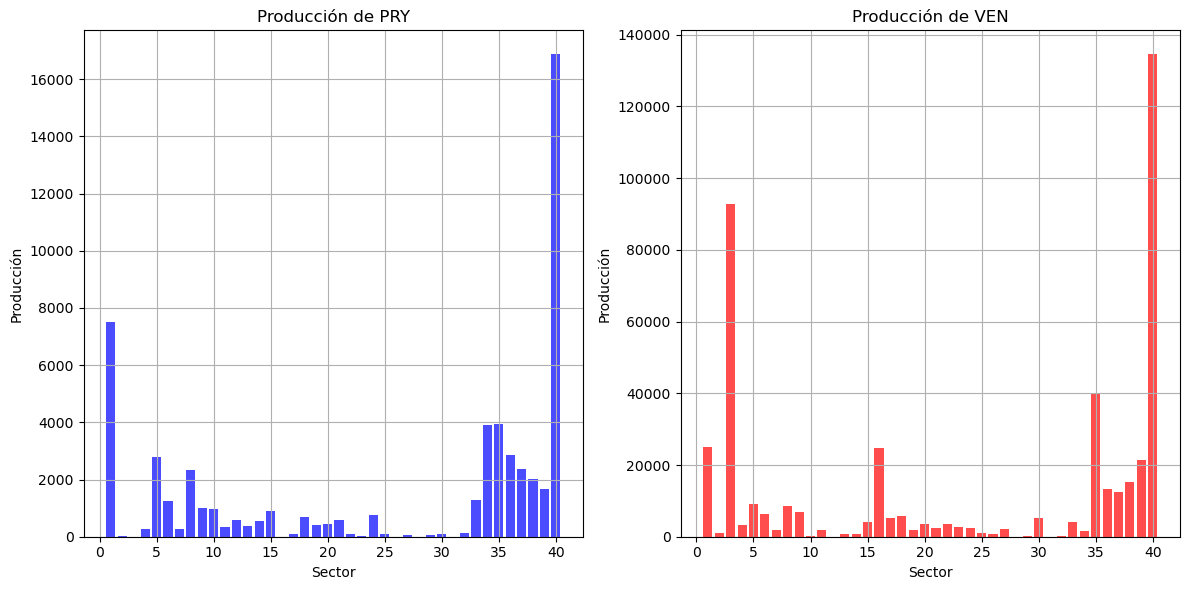

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Creamos los ejes de las gráficas (índices de los sectores de PRY y VEN)
sectors = np.arange(1, 41)  # Sectores de PRY (1 al 40)

# Gráfico para la variación de PRY
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.bar(sectors, p_ajustado[:40], color='b', alpha=0.7)
plt.title('Producción de PRY')
plt.ylabel('Producción')
plt.xlabel('Sector')
plt.grid(True)

# Gráfico para la variación de VEN
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.bar(sectors, p_ajustado[40:], color='r', alpha=0.7)
plt.title('Producción de VEN')
plt.ylabel('Producción')
plt.xlabel('Sector')
plt.grid(True)

plt.tight_layout()
plt.show()

In [38]:
## Dividimos a Z en bloques intra-regionales e inter-regionales
Z_PRY_PRY = Z[:40,:40]  # submatriz de flujo intra-regional para PRY
Z_PRY_VEN = Z[:40,40:]  # submatriz de flujo inter-regional de PRY a VEN
Z_VEN_PRY = Z[40:,:40]  # submatriz de flujo inter-regional de VEN a PRY
Z_VEN_VEN = Z[40:,40:]  # submatriz de flujo intra-regional para VEN

In [40]:
## Creamos las matrices diagonales P, para cada region
P_inversa_PRY = (1/(p_ajustado[:40]))*np.eye(40)
P_inversa_VEN = (1/(p_ajustado[40:]))*np.eye(40)

In [76]:
## Ahora calculamos los coeficientes tecnicos para cada bloque
A_PRY_PRY = Z_PRY_PRY @ P_inversa_PRY
A_PRY_VEN = Z_PRY_VEN @ P_inversa_VEN
A_VEN_PRY = Z_VEN_PRY @ P_inversa_PRY
A_VEN_VEN = Z_VEN_VEN @ P_inversa_VEN

In [44]:
## Usamos las submatrices para crear la matriz de coeficientes técnicos A en bloques
A = np.zeros((80, 80))

for i in range(40):
    for j in range(40):
        A[i, j] = A_PRY_PRY[i, j]
        A[i, j + 40] = A_PRY_VEN[i, j]
        A[i + 40, j] = A_VEN_PRY[i, j]
        A[i + 40, j + 40] = A_VEN_VEN[i, j]

Ahora que tenemos la matriz de coeficientes técnicos A total, vamos a calcular la demanda $\mathbf{d}$ con la ecuación $(\mathbf{I}-\mathbf{A})\mathbf{p}=\mathbf{d}$

In [78]:
I_80 = np.eye(80)

d = (I_80 - A) @ p_ajustado

Una vez calculada la demanda, pasaremos a analizar cómo afecta en la producción de ambas regiones un shock en algunos sectores del país PRY.  
Simularemos un shock negativo sobre el sector s05 del 10% del total del sector, y un shock positivo del 3.3% del total de cada uno de los siguientes sectores: s06, s07 y s08.

Recordemos antes la fórmula obtenida en la Consigna 6, aplicada a nuestro caso:
$$
\Delta \mathbf{p}^{PRY} = (\mathbf{I}-\mathbf{A}^{PRY,PRY}-\mathbf{A}^{PRY,VEN}(\mathbf{I}-\mathbf{A}^{VEN,VEN})^{-1}\mathbf{A}^{VEN,PRY})^{-1}\Delta \mathbf{d}^{PRY}
$$

In [48]:
## Creamos el vector de la variación de la demanda
delta_d_PRY = np.zeros(40)

# Shock negativo del 10% en el sector s05
delta_d_PRY[4] = -0.10 * d[4]

# Shocks positivos del 3.3% en los sectores s06, s07 y s08
delta_d_PRY[5] = 0.033 * d[5]
delta_d_PRY[6] = 0.033 * d[6]
delta_d_PRY[7] = 0.033 * d[7]

In [50]:
I_40 = np.eye(40)

## Usamos descomposición LU para calcular las inversas
L,U,P = funciones.calcularLU(I_40 - A_VEN_VEN)
I_menosA_VEN_VEN_inv = funciones.inversaLU(L,U,P)

term = I_40 - A_PRY_PRY - A_PRY_VEN@I_menosA_VEN_VEN_inv@A_VEN_PRY
L,U,P = funciones.calcularLU(term)
term_inv = funciones.inversaLU(L,U,P)

In [52]:
delta_p_PRY = term_inv@delta_d_PRY

De la ecuación $(4)$ de la Consigna 6 deducimos que:
$$
\Delta p^{VEN} = (I - A^{VEN,VEN})^{-1} A^{VEN,PRY} \Delta p^{PRY}
$$

In [54]:
delta_p_VEN = I_menosA_VEN_VEN_inv @ A_VEN_PRY @ delta_p_PRY

Graficamos ahora ambas variaciones en la producción calculadas:

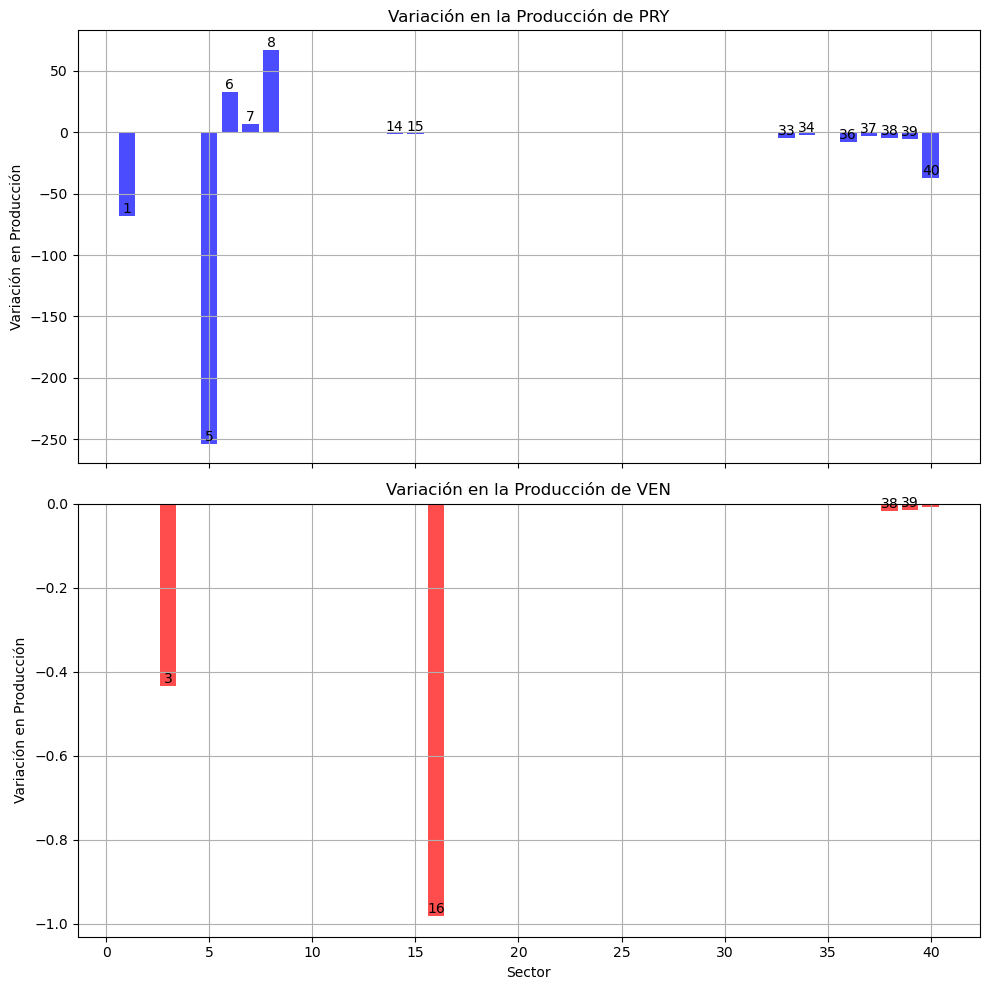

In [56]:
## Crear un fig con dos subgráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

## Gráfico para la variación de PRY
bars_PRY = axs[0].bar(sectors, delta_p_PRY, color='b', alpha=0.7)
axs[0].set_title('Variación en la Producción de PRY')
axs[0].set_ylabel('Variación en Producción')
axs[0].grid(True)

## Añadir etiquetas en las barras de PRY que tengan variación significativa
for bar in bars_PRY:
    height = bar.get_height()
    if abs(height) > 1:  # Mostrar etiquetas solo para variaciones > 1
        axs[0].text(bar.get_x() + bar.get_width() / 2, height,
                    f'{int(bar.get_x())+1}', ha='center', va='bottom')

## Gráfico para la variación de VEN
bars_VEN = axs[1].bar(sectors, delta_p_VEN, color='r', alpha=0.7)
axs[1].set_title('Variación en la Producción de VEN')
axs[1].set_xlabel('Sector')
axs[1].set_ylabel('Variación en Producción')
axs[1].grid(True)

## Añadir etiquetas en las barras de VEN que tengan variación significativa
for bar in bars_VEN:
    height = bar.get_height()
    if abs(height) > 1e-2:  # Mostrar etiquetas solo para variaciones > 0,01
        axs[1].text(bar.get_x() + bar.get_width() / 2, height,
                    f'{int(bar.get_x())+1}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

A la hora de analizar estos gráficos, es muy importante tener en cuenta la escala, ya que las variaciones en la producción de VEN ni siquiera superan el millón de dolares para el shock que calculamos. Mientras que la variación en la producción de PRY es mucho mayor, llegando a variar en más de 250 millones de dolares para el sector 5 (el cual sufrio un shock negativo del 10% en su demanda). Con esto podríamos concluir que los sectores que sufrieron el shock de demanda en el país PRY, no están muy relacionados con la economía de VEN (a excepción quizas del sector 3 y 16); en cuanto a la economía intra-regional de PRY, vemos que hay varios sectores afectados además de los que sufrieron directamente un shock en su demanda (en particular el sector 1).  
Por otro lado, observemos que los únicos sectores con una variación positiva en la producción son aquellos que sufrieron un shock de demanda positivo.

In [58]:
## Veamos por ejemplo estos sectores, que parecen estar relacionados en la economía de PRY
print('El sector "', datos['Sector'][5], '" que sufrió un shock negativo del 10% en su demanda, \nafectó a la producción del sector', datos['Sector'][1], '" del país PRY')

El sector " Wheat products and pasta " que sufrió un shock negativo del 10% en su demanda, 
afectó a la producción del sector Hunting and fishing " del país PRY


---------------

Consideremos ahora el modelo de región simple, aplicado a PRY:
$$
\Delta \mathbf{p}^{PRY} = ( \mathbf{I} - \mathbf{A}^{PRY,PRY})^{-1} \Delta \mathbf{d}^{PRY}
$$

In [84]:
## Primero calculamos d para el modelo de región simple
d_PRY_simple = (I_40 - A_PRY_PRY) @ p_ajustado[:40]


## Y volvemos a crear el delta d para el modelo simple

delta_d_PRY_simple = np.zeros(40)
## Shock negativo del 10% en el sector s05
delta_d_PRY_simple[4] = -0.10 * d_PRY_simple[4]

## Shocks positivos del 3.3% en los sectores s06, s07 y s08
delta_d_PRY_simple[5] = 0.033 * d_PRY_simple[5]
delta_d_PRY_simple[6] = 0.033 * d_PRY_simple[6]
delta_d_PRY_simple[7] = 0.033 * d_PRY_simple[7]

In [86]:
L,U,P = funciones.calcularLU(I_40 - A_PRY_PRY)
I_menosA_PRY_PRY_inv = funciones.inversaLU(L,U,P)
delta_p_PRY_simple = I_menosA_PRY_PRY_inv @ delta_d_PRY_simple

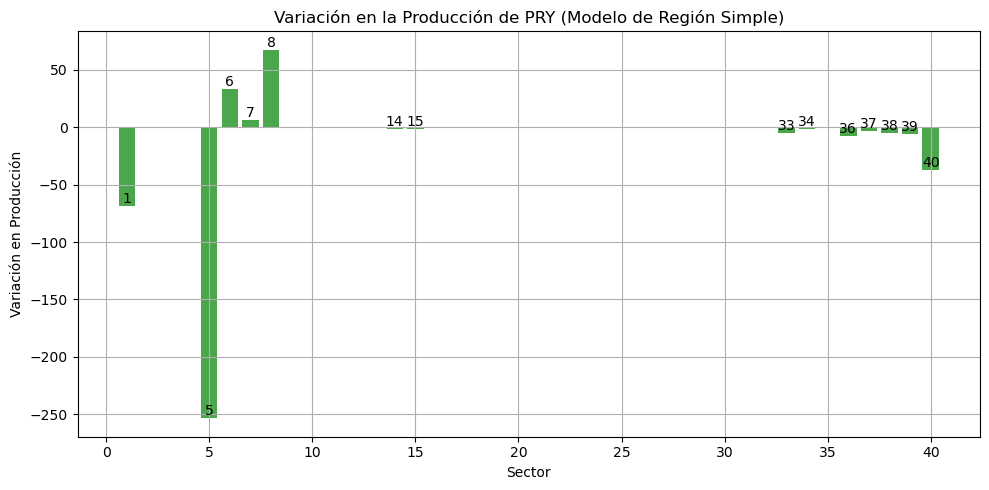

In [88]:
plt.figure(figsize=(10, 5))

# Gráfico para la variación de PRY en el modelo de región simple
plt.bar(sectors, delta_p_PRY_simple, color='g', alpha=0.7)
plt.title('Variación en la Producción de PRY (Modelo de Región Simple)')
plt.ylabel('Variación en Producción')
plt.xlabel('Sector')
plt.grid(True)

# Añadir etiquetas para las barras con variación significativa
for i, bar in enumerate(delta_p_PRY_simple):
    if abs(bar) > 1:  
        plt.text(i + 1, bar, f'{i+1}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

Aparentemente obtuvimos resultados idénticos, al menos a simple vista. Esto nos indica que las economías de PRY y VEN están poco muy conectadas.  
Veámoslo más detalladamente:

In [98]:
np.allclose(delta_p_PRY, delta_p_PRY_simple)

False

Vemos que no son iguales. Mostraremos ahora que la diferencia es despreciable.

In [111]:
diferencia = delta_p_PRY - delta_p_PRY_simple
norma1_diferencia = np.linalg.norm(diferencia, ord=1)

print('La norma 1 de la diferencia entre los vectores es: ', norma1_diferencia)

La norma 1 de la diferencia entre los vectores es:  1.1747766420574732


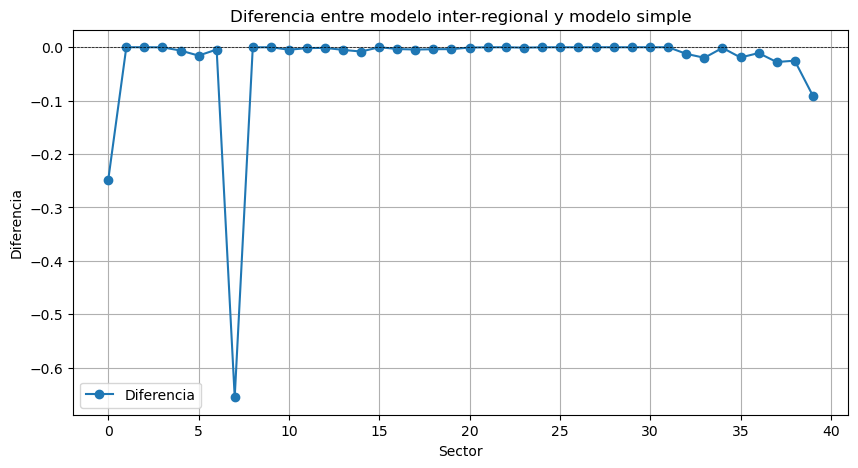

In [129]:
## Gráfico de la diferencia entre los delta de producción para los modelos inter-regional y modelo simple
plt.figure(figsize=(10, 5))
plt.plot(diferencia, label='Diferencia', marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Línea en y=0 para referencia
plt.title("Diferencia entre modelo inter-regional y modelo simple")
plt.xlabel("Sector")
plt.ylabel("Diferencia")
plt.legend()
plt.grid(True)

plt.show()

Podemos ver que la diferencia en la mayoría de sectores es cercana a 0, y en ningún sector es mayor a 1. Por último veamos la diferencia relativa a ambos vectores:

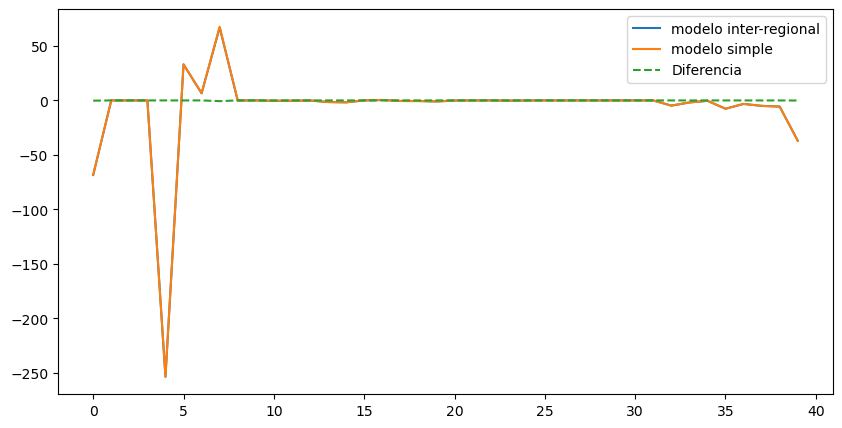

In [132]:
## Gráfico de la diferencia junto a los vectores
plt.figure(figsize=(10, 5))
plt.plot(delta_p_PRY, label='modelo inter-regional')
plt.plot(delta_p_PRY_simple, label='modelo simple')
plt.plot(diferencia, label='Diferencia', linestyle='--')

plt.legend()
plt.show()

Por lo tanto, vemos que en este caso, la diferencia entre el modelo inter-regional y el modelo simple es despreciable.  
Analicemos esto matricialmente, calcularemos la norma 1, norma de Frobenius y la norma infinito de cada una de las matrices para mostrar que $\mathbf{A}^{PRY,PRY}$ y $\mathbf{A}^{VEN,VEN}$ tienen valores más significativos que $\mathbf{A}^{PRY,VEN}$ $\mathbf{A}^{VEN,PRY}$ 

In [176]:
# Calcula la norma 1 de cada matriz
norma_1_A_PRY_PRY = np.linalg.norm(A_PRY_PRY, ord=1)
norma_1_A_VEN_VEN = np.linalg.norm(A_VEN_VEN, ord=1)
norma_1_A_PRY_VEN = np.linalg.norm(A_PRY_VEN, ord=1)
norma_1_A_VEN_PRY = np.linalg.norm(A_VEN_PRY, ord=1)

norma_1 = [norma_1_A_PRY_PRY, norma_1_A_VEN_VEN, norma_1_A_PRY_VEN, norma_1_A_VEN_PRY]

# Calcula la norma Frobenius de cada matriz
norma_frobenius_A_PRY_PRY = np.linalg.norm(A_PRY_PRY, ord='fro')
norma_frobenius_A_VEN_VEN = np.linalg.norm(A_VEN_VEN, ord='fro')
norma_frobenius_A_PRY_VEN = np.linalg.norm(A_PRY_VEN, ord='fro')
norma_frobenius_A_VEN_PRY = np.linalg.norm(A_VEN_PRY, ord='fro')

norma_frobenius = [norma_frobenius_A_PRY_PRY, norma_frobenius_A_VEN_VEN, norma_frobenius_A_PRY_VEN, norma_frobenius_A_VEN_PRY]

# Calcula la norma infinito de cada matriz
norma_inf_A_PRY_PRY = np.linalg.norm(A_PRY_PRY, ord=np.inf)
norma_inf_A_VEN_VEN = np.linalg.norm(A_VEN_VEN, ord=np.inf)
norma_inf_A_PRY_VEN = np.linalg.norm(A_PRY_VEN, ord=np.inf)
norma_inf_A_VEN_PRY = np.linalg.norm(A_VEN_PRY, ord=np.inf)

norma_inf = [norma_inf_A_PRY_PRY, norma_inf_A_VEN_VEN, norma_inf_A_PRY_VEN, norma_inf_A_VEN_PRY]

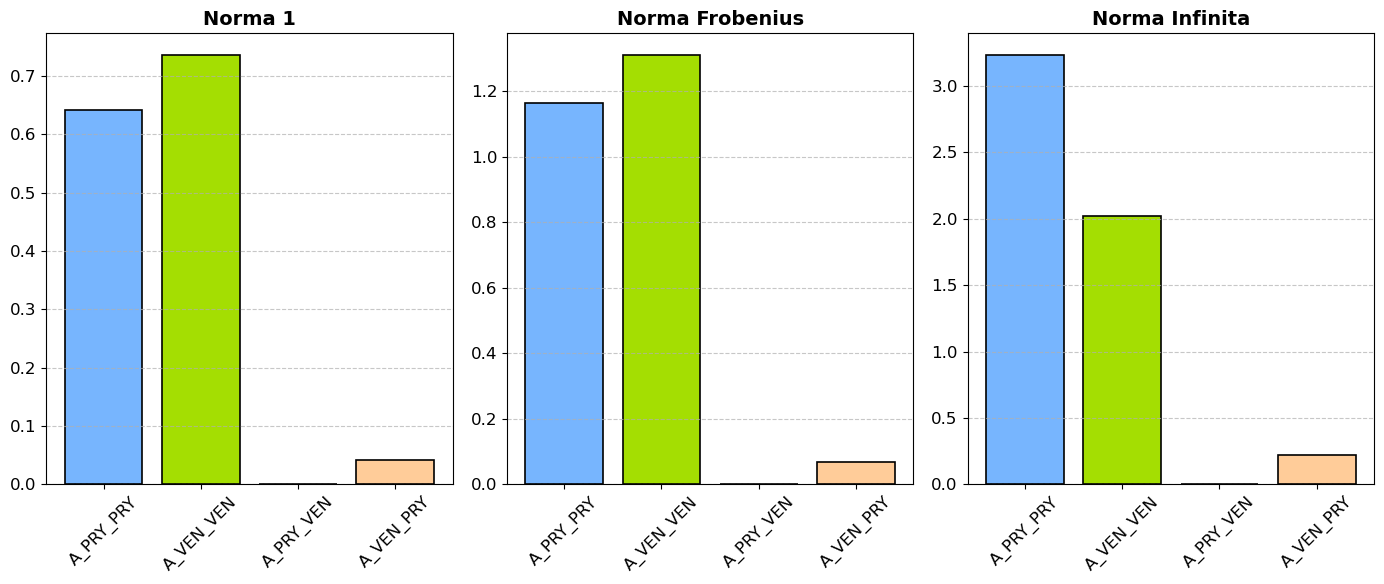

In [198]:
import matplotlib.pyplot as plt

labels = ['A_PRY_PRY', 'A_VEN_VEN', 'A_PRY_VEN', 'A_VEN_PRY']
plt.figure(figsize=(14, 6))

colors = ['#77b5fe', '#a4de02', '#ff9999', '#ffcc99']  
bar_style = {'edgecolor': 'black', 'linewidth': 1.2}
plt.rc('font', size=12)

# Gráfico de norma 1
plt.subplot(1, 3, 1)
plt.bar(labels, norma_1, color=colors, **bar_style)
plt.title('Norma 1', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de norma Frobenius
plt.subplot(1, 3, 2)
plt.bar(labels, norma_frobenius, color=colors, **bar_style)
plt.title('Norma Frobenius', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de norma infinito
plt.subplot(1, 3, 3)
plt.bar(labels, norma_inf, color=colors, **bar_style)
plt.title('Norma Infinita', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Como pensábamos, las normas de las matrices de $\mathbf{A}^{PRY,PRY}$ y $\mathbf{A}^{VEN,VEN}$ son mucho mayores que las de $\mathbf{A}^{PRY,VEN}$ $\mathbf{A}^{VEN,PRY}$.  
Este análisis confirma que las economías entre PRY y VEN estan muy poco conectadas, por lo que en este caso podríamos usar el modelo de región simple, que es mas sencillo y obtendríamos prácticamente los mismos resultados.